In [4]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data = load_breast_cancer()
X=data.data
y=data.target

In [6]:
data.data.shape

(569, 30)

In [14]:
lrl1 = LogisticRegression(penalty='l1',solver='liblinear',C=0.5,max_iter=1000)
lrl2 = LogisticRegression(penalty='l2',solver='liblinear',C=0.5,max_iter=1000)

lrl1 = lrl1.fit(X,y)
lrl1.coef_
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [15]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_
(lrl2.coef_ != 0).sum(axis=1)

array([30])

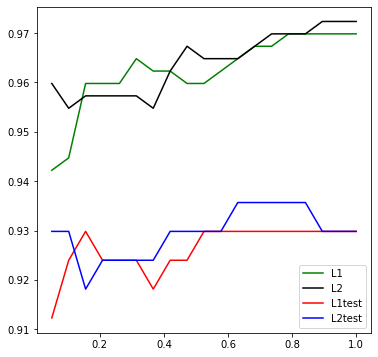

In [27]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1 = LogisticRegression(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LogisticRegression(penalty="l2",solver="liblinear",C=i,max_iter=1000)

    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","red","blue"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
data = load_breast_cancer()
data.data.shape


(569, 30)

In [31]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape

(569, 9)

In [33]:
cross_val_score(LR_,X,data.target,cv=10).mean()

0.9490601503759398

In [32]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.10897274787330495, 17)
(0.2179454957466099, 12)
(0.32691824361991484, 10)
(0.4358909914932198, 8)
(0.5448637393665248, 8)
(0.6538364872398297, 5)
(0.7628092351131347, 5)
(0.8717819829864396, 5)
(0.9807547308597445, 5)
(1.0897274787330495, 5)
(1.1987002266063544, 4)
(1.3076729744796594, 3)
(1.4166457223529643, 2)
(1.5256184702262694, 2)
(1.6345912180995743, 1)
(1.7435639659728792, 1)
(1.8525367138461841, 1)
(1.961509461719489, 1)
(2.070482209592794, 1)


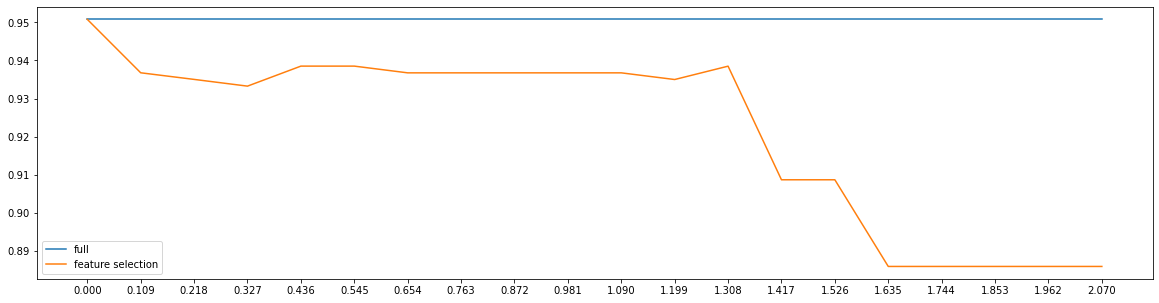

In [35]:
fullx = []
fsx = []
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1

plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

0.9561090225563911 7.01


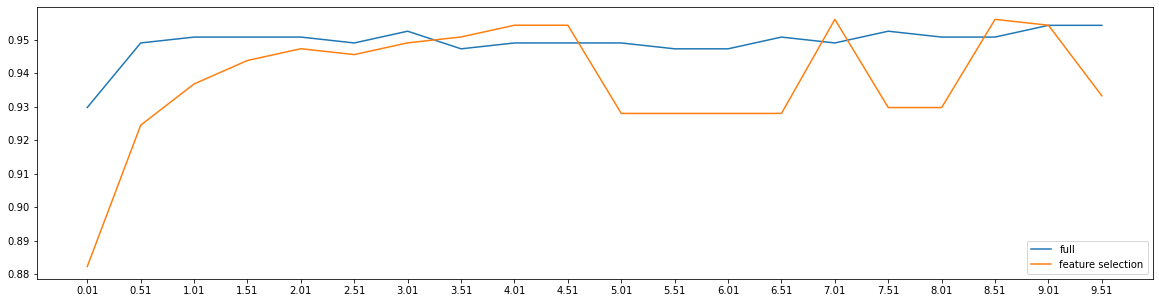

In [36]:
fullx = []
fsx = []
C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)

    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())

    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [38]:
C[fsx.index(max(fsx))] 

7.01

0.9561090225563911 6.069999999999999


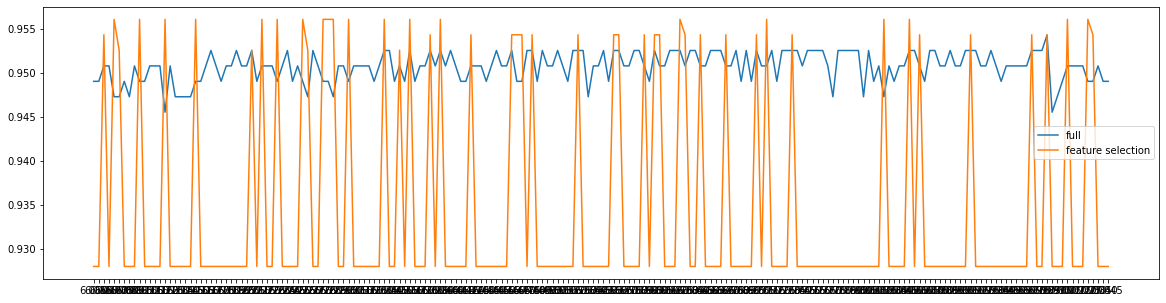

In [40]:
fullx = []
fsx = []
C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)

    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())

    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()


In [41]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()


0.9473057644110275

In [43]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


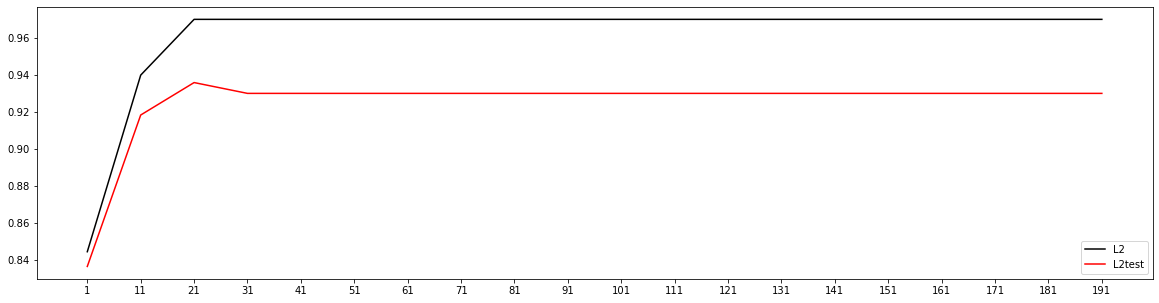

array([25], dtype=int32)

In [45]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l2,l2test]
color = ["black","red"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
for multi_class in ('multinomial', 'ovr','auto'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
     multi_class=multi_class).fit(iris.data, iris.target) #打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), 
multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)
training score : 0.987 (auto)


d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
